In [19]:
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
# Define a simple transform: resize images to 64x64 and convert them to tensors
transform = transforms.Compose([transforms.ToTensor()
])
# Download and load the CelebA training split dataset
celeba_dataset = CelebA(root='../data', split='train', transform=transform, download=True)
celeba_loader = DataLoader(celeba_dataset, batch_size=32, shuffle=True)

In [20]:
# Example: Fetch one batch and print the dimensions of images and labels
images, attributes = next(iter(celeba_loader))
print("Images batch shape:", images.shape)
print("Attributes batch shape:", attributes.shape)

Images batch shape: torch.Size([32, 3, 218, 178])
Attributes batch shape: torch.Size([32, 40])


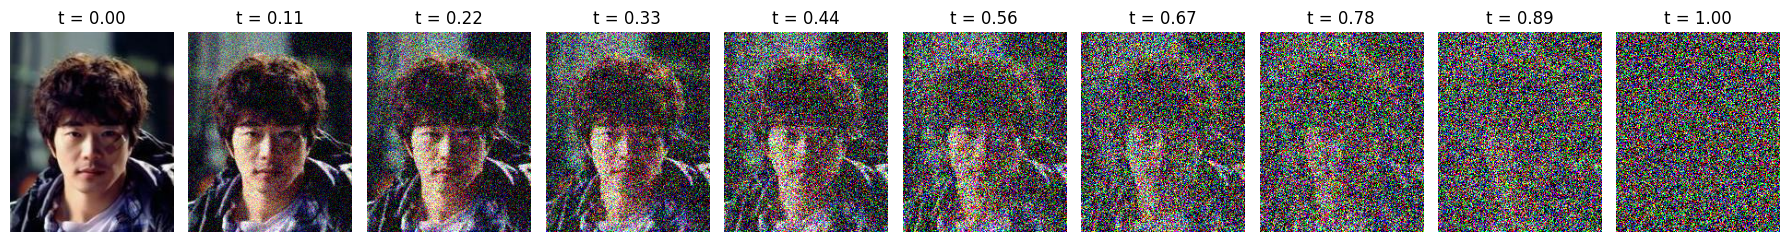

In [28]:
import torch

import matplotlib.pyplot as plt

x0 = images[0].clone()
time_steps = torch.linspace(0, 1, steps=10) 
var_schedule =  1 - torch.cos(time_steps * torch.pi / 2) # Variance schedule

fig, axes = plt.subplots(1, len(time_steps), figsize=(18, 3))
for i, (ax, t) in enumerate(zip(axes, time_steps)):
    noise = torch.randn_like(x0)
    x_t = (torch.sqrt(1 - var_schedule[i]) * x0 + torch.sqrt(var_schedule[i]) * noise).clamp(0, 1)
    img_t = x_t.permute(1, 2, 0).cpu().numpy()
    ax.imshow(img_t)
    ax.axis('off')
    ax.set_title(f't = {t:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
# implemet the ddpm model, by first defineing the U-net module, and then the ddpm model

import torch
import torch.nn as nn
import torch.nn.functional as F
